## Project Objective

Dataset Details: This dataset consists of the following attributes [“show_id”, “type”, “title”, “director”, “cast”, “country”, “date_added”, “release_year”, “rating”]

Objective: The main purpose of analyzing this Netflix movies & tv shows dataset is to gain insights into the content available on the platform and to identify trends & patterns in the type of content, release years, countries, and ratings. This analysis can help Netflix and its stakeholders understand the user preferences and viewing habits, optimize content acquisition & production decisions, and improve the user experience on the platform.

Basically, I will be using the the machine learning technique [Content-Based filtering] to identify patterns & make recommendations.  

Content-based filtering – This technique can be used to make recommendations based on the attributes of titles themselves, such as genre, cast, director and rating. For ex: If a Netflix user watches comedies, this algorithm can identify other titles on the platform that are also classified as comedies and recommend them to the user.

List of Hypotheses to prove/disprove:

The number of movies & tv shows added to Netflix has increased over the years
The US produces a majority of content on Netflix
The most common genre on Netflix is drama
The cast & director of a title have a significant impact on its rating


## List of some of important packages

1. Pandas: Pandas is a Python library for data manipulation and analysis. It provides data structures for efficiently storing and manipulating large datasets, as well as functions for performing a wide range of data analysis tasks.

2. Seaborn: Seaborn is a Python data visualization library that is built on top of Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. Seaborn offers a wide range of visualization types, including scatter plots, line plots, bar plots, histograms, heatmaps, and more. It also provides advanced features for customization, such as color palettes, multiple plot grids, and statistical annotations.

3. Matplotlib: Matplotlib is a Python data visualization library that is widely used for creating static, interactive, and animated visualizations in Python. It provides a comprehensive set of tools for creating a wide range of visualizations, including line plots, scatter plots, bar plots, histograms, heatmaps, and more.

4. Scikit-learn: Scikit-learn is a Python library for machine learning and data analysis. It provides tools for building and applying a wide range of machine learning models, as well as for data preprocessing, feature selection, and model evaluation.

5. statsmodels.formula.api: The statsmodels.formula.api package is a Python library that provides a formula-based interface for specifying statistical models. It is built on top of the statsmodels library, which provides a wide range of statistical modeling tools.

6. TensorFlow: It is an open-source library developed by Google Brain Team for building and training machine learning models. It provides a comprehensive set of tools for building and deploying machine learning applications across different platforms, including desktops, servers, and mobile devices. TensorFlow is built on a dataflow graph model, which allows for efficient parallel processing and optimization of computations.

7. Missingno: The missingno package is a Python library that provides a way to visualize missing data in a dataset. This package provides various tools to identify and visualize missing data patterns in a dataset, such as matrix bar plots, heatmaps, dendrograms, and nullity correlation plots.

## Import all the necessary packages



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_recommenders as tfrs
import missingno as msno

## Load the dataset

In [70]:
df = pd.read_csv('C:\\Rohan\\SharpestMinds - Projects\\Project 3\\netflix_titles.csv')

## Understanding the data

In [71]:
# Obtain the first 5 rows of this dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [72]:
# Obtain the last 5 rows of this dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,01-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,01-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,02-Mar-19,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [73]:
# Obtain the dimensions of this dataset
df.shape

(8807, 12)

As we can see that this netflix tv shows & movies dataset has about 8807 rows and 12 attributes.

In [74]:
# Obtain all the 12 attributes of this dataset
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [75]:
# Obtain the data types for each of the attributes
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [76]:
# Convert the data type for the attribute "release_year" to object data type
df['release_year'] = df['release_year'].astype(str)

# Check the data types of all attributes
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year    object
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [77]:
# Obtain more info for each of the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   object
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: object(12)
memory usage: 825.8+ KB


In [78]:
# Obtain the structure of this dataset
str(df)

"     show_id     type                  title         director  \\\n0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   \n1         s2  TV Show          Blood & Water              NaN   \n2         s3  TV Show              Ganglands  Julien Leclercq   \n3         s4  TV Show  Jailbirds New Orleans              NaN   \n4         s5  TV Show           Kota Factory              NaN   \n...      ...      ...                    ...              ...   \n8802   s8803    Movie                 Zodiac    David Fincher   \n8803   s8804  TV Show            Zombie Dumb              NaN   \n8804   s8805    Movie             Zombieland  Ruben Fleischer   \n8805   s8806    Movie                   Zoom     Peter Hewitt   \n8806   s8807    Movie                 Zubaan      Mozez Singh   \n\n                                                   cast        country  \\\n0                                                   NaN  United States   \n1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban.

## Data Cleansing

### Handling Missing Data

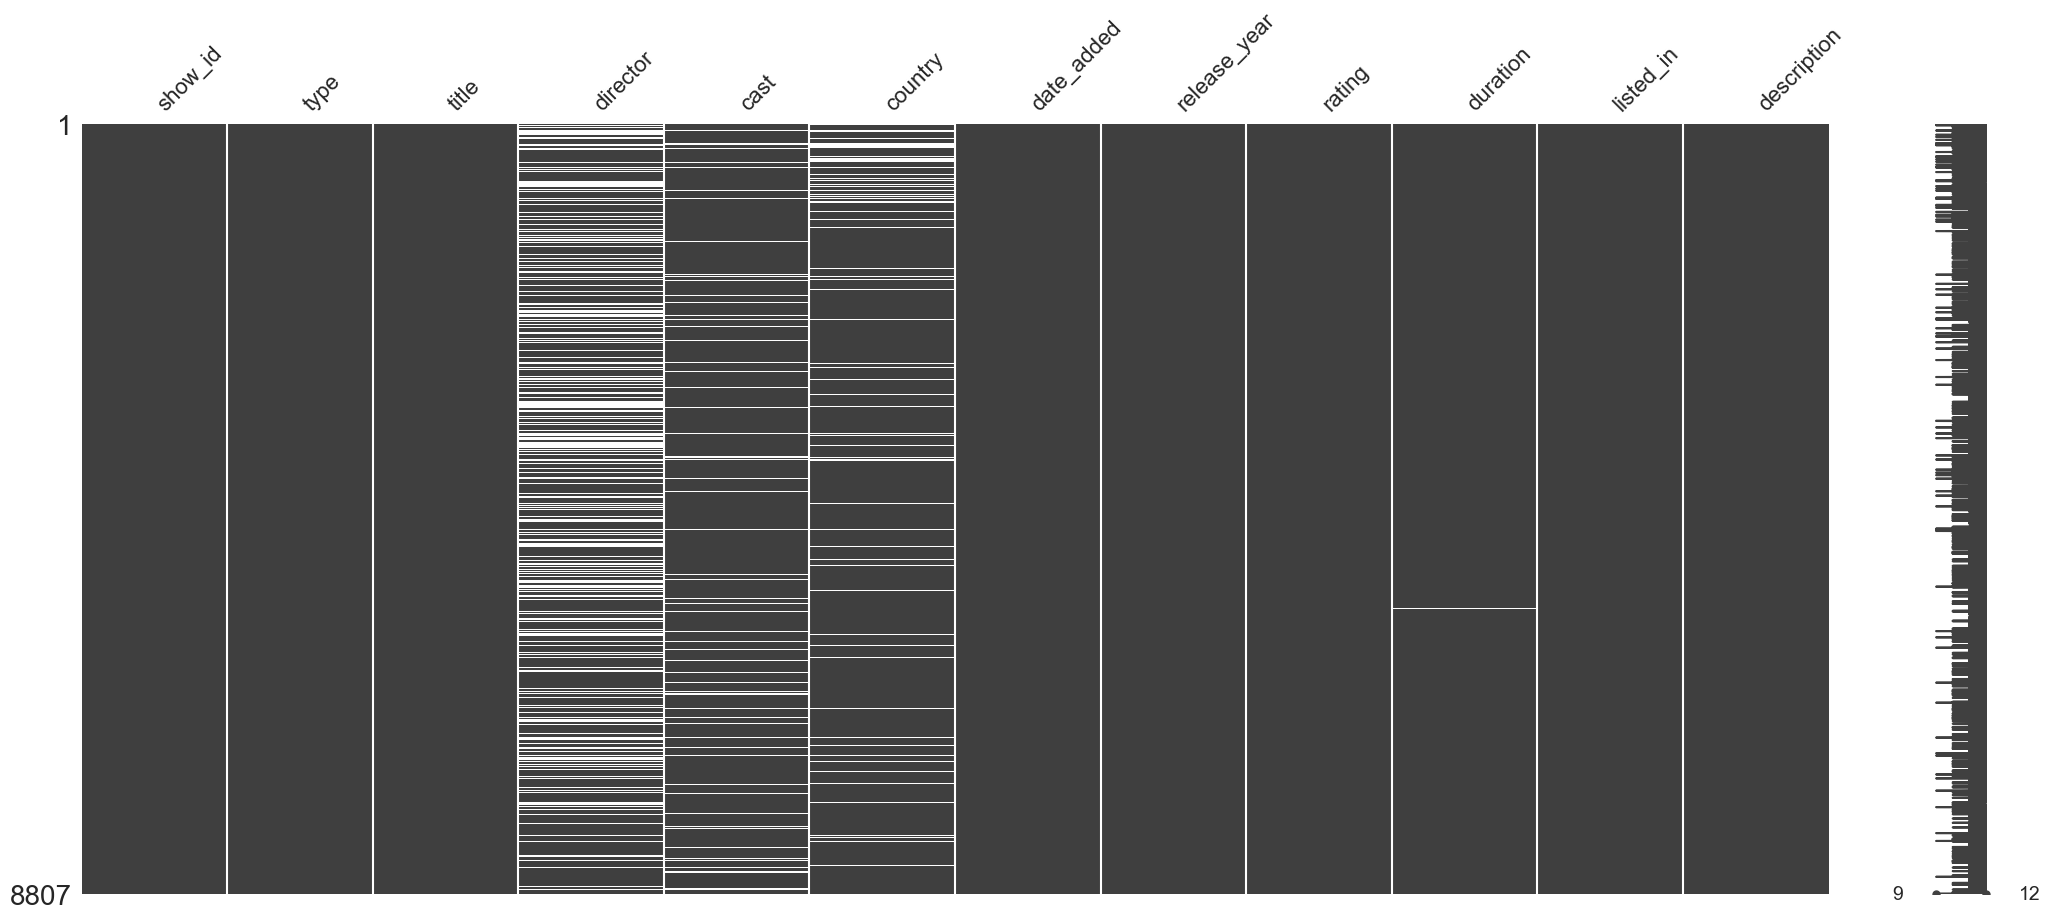

In [79]:
# Visualize missing values as a matrix
msno.matrix(df);

From this given matrix, we can see that most of the attributes do not have missing values except for "director", "cast" & "country".

In [80]:
# Obtain the number of missing values for each of the attributes
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

We can see that the attribute "director" has the most number of missing avlues followed by "cast", "country", date_added", "rating" & "duration". 

Instead of removing the columns that have missing avlues, I will be filling in the missing values using the fillna method
This method is a function in pandas that is used to fill in the missing values (NaN or None) in a DataFrame or a Series object. This method provides several options to fill in the missing values, such as forward fill, backward fill, interpolation, or a constant value.

For the "director", "cast", and "country" attributes, it is challenging to fill in missing values, given that there is no apparent correlation between these attributes and the other attributes in the dataset. Hence, we may choose to remove the rows with missing values for these attributes. We can use the dropna() method in pandas to drop the rows containing null values for these attributes.

For the "date_added" attribute, we can fill in the missing values by using the fillna() method in pandas. We can fill the missing values with the most common date in the dataset or the median date. The approach depends on the analysis or model being developed.

For the "rating" attribute, since it is a categorical variable, we can create a new category called "Unknown" and assign the missing values to it.

For the "duration" attribute, I will be replacing all the missing values in it with "Not Specified"

In [81]:
# Drop null values for "director", "cast", and "country" attributes
df.dropna(subset=["director", "cast", "country"], inplace=True)

# Fill missing values for "date_added" attribute
df["date_added"].fillna(df["date_added"].mode()[0], inplace=True)

# Create a new category for missing values in "rating" attribute
df["rating"].fillna("Unknown", inplace=True)

# Replace all the missing values for the attribute "duration" with "Not Specified"
df["duration"].fillna("Not Specified", inplace = True)

In [82]:
# Check if all the missing values have been removed & or replaced
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [83]:
# Obtain the number of rows and column after handling the missing values
df.shape

(5336, 12)

### Handling Duplicates

In [84]:
# Count the number of duplicate records
num_duplicates = df.duplicated().sum()

# Print the result
print("Number of duplicate records:", num_duplicates)

Number of duplicate records: 0


We can observe that there are no duplicate records in this dataset.

## Data Summary

Finding summary statistics for data is important because it provides a concise and informative description of the data. Summary statistics allow us to understand key characteristics of the data, such as the central tendency, variability, and distribution of the data.

In [85]:
# Obtain the summary statistics for this dataset
df.describe()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,5336,5336,5336,5336,5336,5336,5336,5336,5336,5336,5336,5336
unique,5336,2,5334,3947,5202,604,1454,72,18,199,335,5325
top,s8,Movie,22-Jul,"Raúl Campos, Jan Suter",Samuel West,United States,01-Jan-20,2017,TV-MA,94 min,"Dramas, International Movies","On India's Independence Day, a zany mishap in ..."
freq,1,5189,2,18,10,1849,92,658,1822,135,336,2


In [86]:
# Obtain the number of unique values for each of the attributes
df.nunique()

show_id         5336
type               2
title           5334
director        3947
cast            5202
country          604
date_added      1454
release_year      72
rating            18
duration         199
listed_in        335
description     5325
dtype: int64

In [87]:
# Change the column heading of "listed_in" to "genre"
df = df.rename({'listed_in':'genre'}, axis = 1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,24-Sep-21,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,24-Sep-21,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",23-Sep-21,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,21-Sep-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [88]:
# Obtain the count for all the countries in this dataset
country_counts = df["country"].value_counts()

# Print the count for each country
print(country_counts)

United States                                   1849
India                                            875
United Kingdom                                   183
Canada                                           107
Spain                                             91
                                                ... 
Uruguay, Guatemala                                 1
Romania, Bulgaria, Hungary                         1
Philippines, United States                         1
India, United Kingdom, Canada, United States       1
United Arab Emirates, Jordan                       1
Name: country, Length: 604, dtype: int64


In [89]:
# Obtain the top 10 countries in this dataset
top_10_countries = country_counts.head(10)

# Print the top 10 countries with the largest count
print(top_10_countries)

United States     1849
India              875
United Kingdom     183
Canada             107
Spain               91
Egypt               90
Nigeria             88
Japan               83
Turkey              79
Indonesia           76
Name: country, dtype: int64


In [90]:
# Find the number of movies & tv shows
shows_counts = df.groupby("type").size().reset_index(name="count")

# Print the resulting dataframe
print(shows_counts)

      type  count
0    Movie   5189
1  TV Show    147


In [91]:
# Obtain the top 10 release year counts for the movies & tv shows
release_year_counts = df["release_year"].value_counts()

top_10_years = release_year_counts.head(10)

print(top_10_years)



2017    658
2018    648
2016    577
2019    519
2020    442
2015    351
2014    242
2013    197
2012    163
2021    161
Name: release_year, dtype: int64


In [92]:
# Obtain the top 10 netflix tv shows and movies with the highest ratings
ratings_counts = df.groupby("rating").size().reset_index(name="count")

Top_10_Ratings = ratings_counts.sort_values(by='count', ascending=False).head(10)

# Print the resulting dataframe
print(Top_10_Ratings)

   rating  count
11  TV-MA   1822
9   TV-14   1214
8       R    778
7   PG-13    470
12  TV-PG    431
6      PG    275
10   TV-G     84
14  TV-Y7     76
13   TV-Y     76
5      NR     58


In [93]:
# Obtain the top 10 netflix tv shows and movies with the highest genre count
genres_counts = df.groupby("genre").size().reset_index(name="count")

Top_10_Genres = genres_counts.sort_values(by='count', ascending=False).head(10)

# Print the resulting dataframe
print(Top_10_Genres)

                                                genre  count
245                      Dramas, International Movies    336
325                                   Stand-Up Comedy    286
159            Comedies, Dramas, International Movies    257
238  Dramas, Independent Movies, International Movies    243
97                 Children & Family Movies, Comedies    179
248     Dramas, International Movies, Romantic Movies    160
210                                     Documentaries    156
176                    Comedies, International Movies    152
179   Comedies, International Movies, Romantic Movies    143
228                                            Dramas    134


We can see that the top netflix shows that were released were of the type 'Dramas, International Movies' followed by stand-up comedy. 

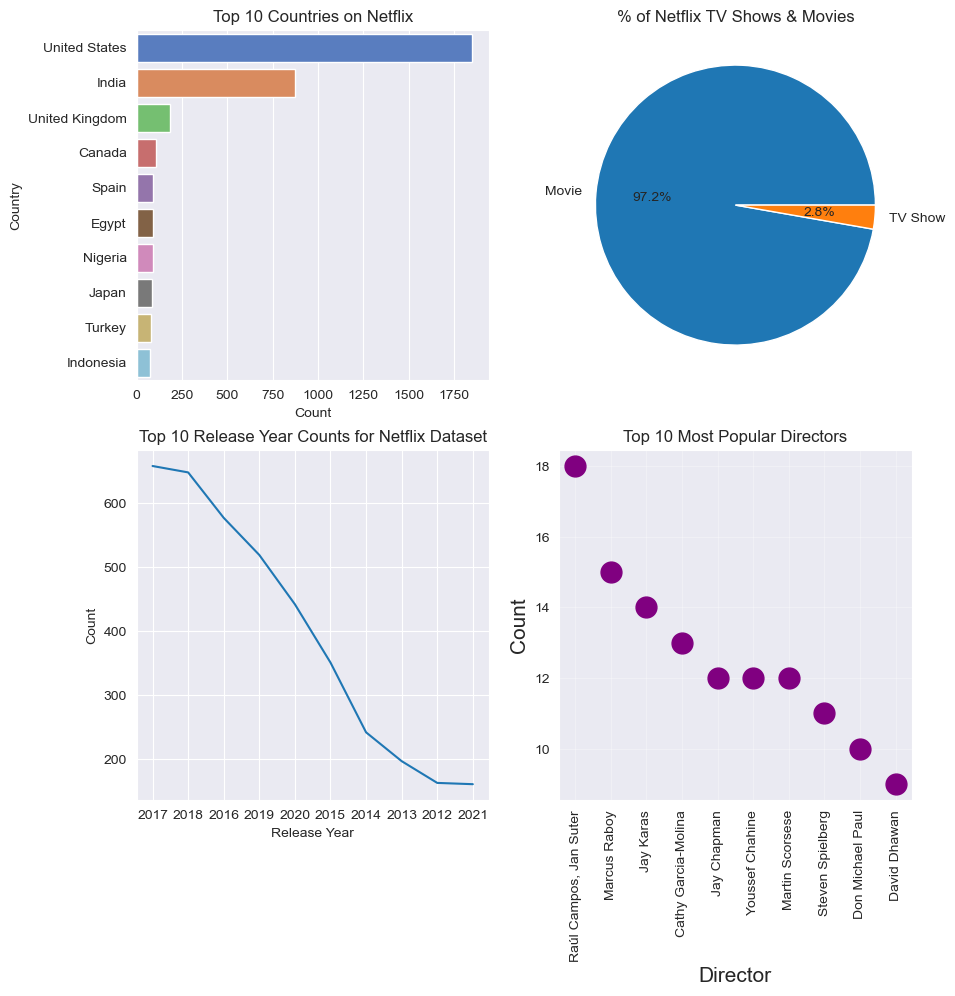

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Create the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Create the bar chart for top 10 countries
country_counts = df.groupby("country").size().reset_index(name="count")
top_10_countries = country_counts.sort_values(by='count', ascending=False).head(10)
sns.barplot(x='count', y='country', data=top_10_countries, palette='muted', ax=axes[0,0])
axes[0,0].set_title('Top 10 Countries on Netflix')
axes[0,0].set_xlabel('Count')
axes[0,0].set_ylabel('Country')

# Create the pie chart for % of Netflix TV shows and movies
shows_counts = df['type'].value_counts()
axes[0,1].pie(shows_counts.values, labels=shows_counts.index, autopct='%1.1f%%')
axes[0,1].set_title("% of Netflix TV Shows & Movies")

# Create the line chart for top 10 release year counts
release_year_counts = pd.Series({
    '2017': 658,
    '2018': 648,
    '2016': 577,
    '2019': 519,
    '2020': 442,
    '2015': 351,
    '2014': 242,
    '2013': 197,
    '2012': 163,
    '2021': 161
})
release_year_counts = release_year_counts.reset_index()
release_year_counts.columns = ['Release Year', 'Count']
sns.lineplot(x='Release Year', y='Count', data=release_year_counts, ax=axes[1,0])
axes[1,0].set_title('Top 10 Release Year Counts for Netflix Dataset')
axes[1,0].set_xlabel('Release Year')
axes[1,0].set_ylabel('Count')

# Create the countplot displaying the most popular directors
directors_count = df['director'].value_counts()

plt.plot(directors_count.head(10), linestyle='none', markersize=15, marker='o', color = 'purple')
plt.title('Top 10 most popular directors', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Most Popular Directors', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.grid(alpha=.3)
plt.margins(.05)

axes[1,1].set_title('Top 10 Most Popular Directors')
axes[1,1].set_xlabel('Director')
axes[1,1].set_ylabel('Count')

plt.show()

First Plot - Displays the top 10 countries that release the most number of Netlfix TV shows & movies. From the given plot, we can see the US has released the most number of netflix shows followed by India & the UK.

Second Plot - Displays the percentage of the Netflix movies & tv shows. We can see that the majority of the netflix shows are of the type "Movie". Only about 3% of the shows released are of the type "TV show". 

Third Plot - Displays the top 10 release year counts. From this plot, one can observe that the highest number of netflix tv shows & movies were released in the year 2017 followed by the years 2018 & 2016.

Fourth Plot - Displays the top 10 most popular directors. From this given countplot, we can infer that the most popular director is "Raul Campos, Jan Sutter" followed by "Marcus Raboy" & "Jay Karas". 

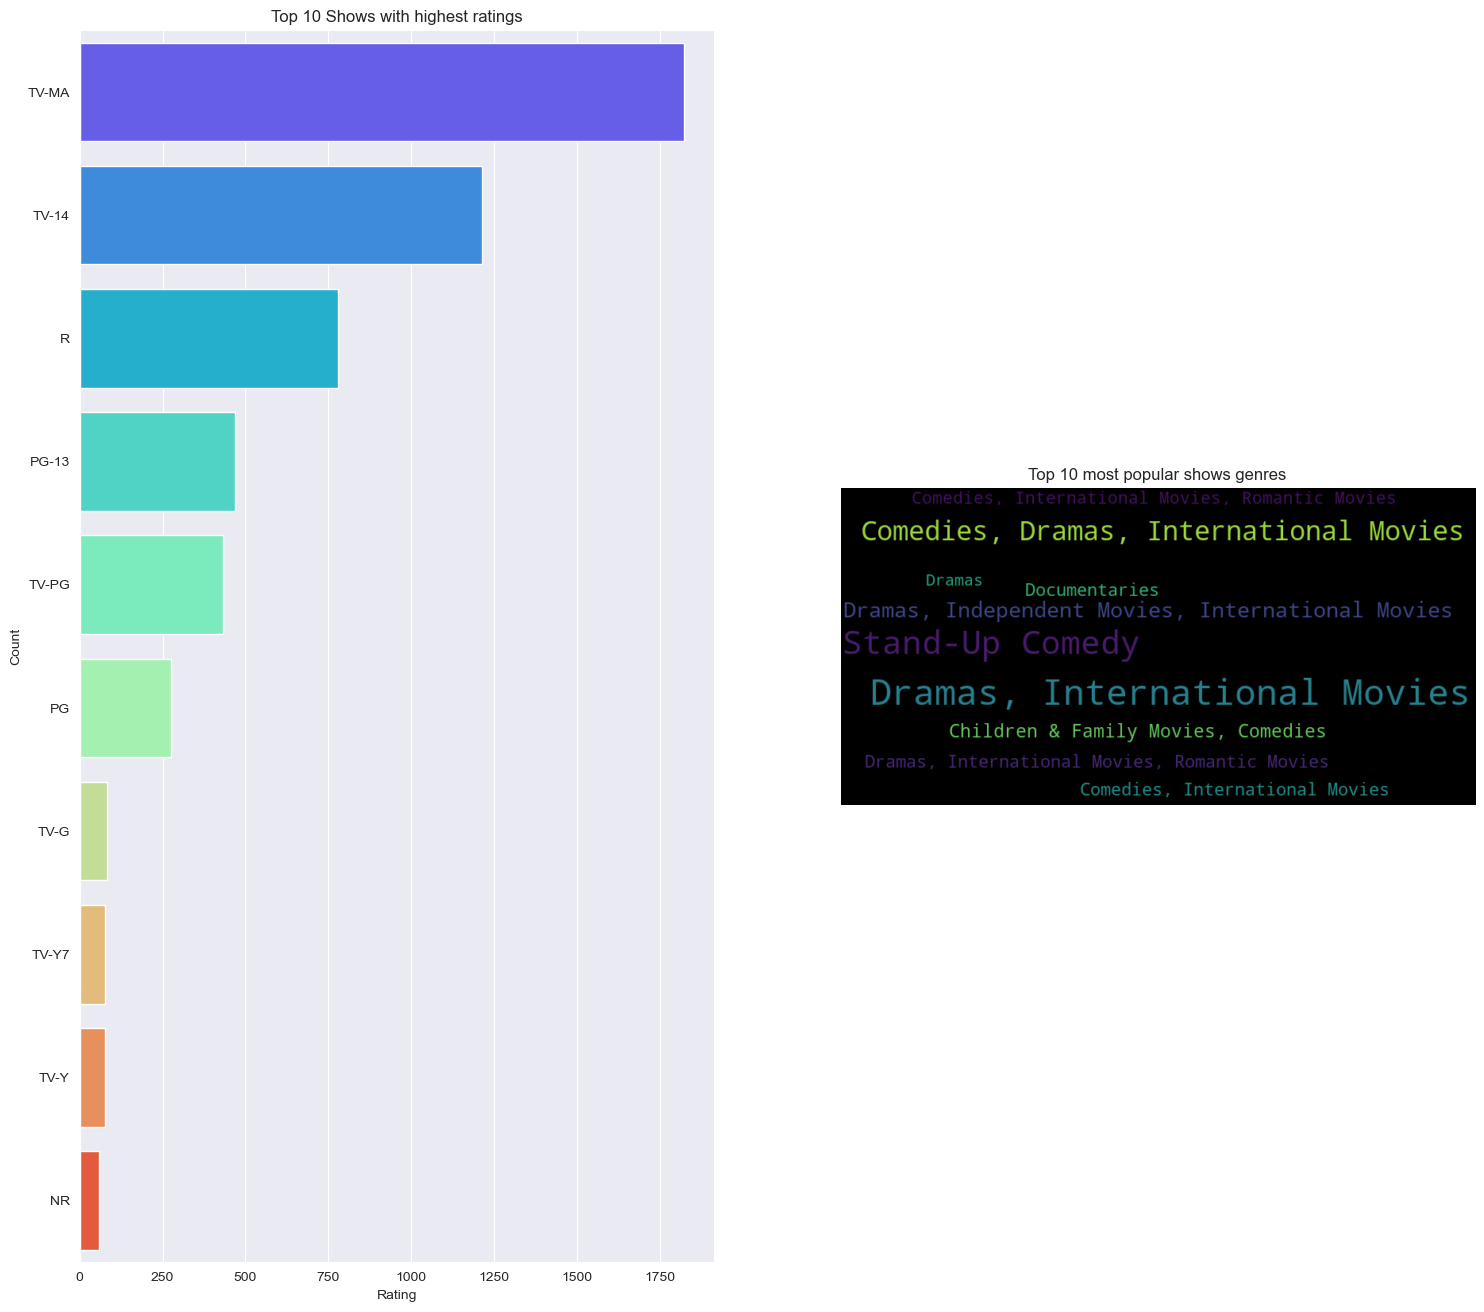

In [95]:
# Create a few subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 16))

# Create a barplot displaying the shows with the highest ratings
ratings_count = df['rating'].value_counts()
Top_10_Ratings = ratings_counts.sort_values(by='count', ascending=False).head(10)


sns.set_style('darkgrid')
sns.barplot(x='count', y='rating', data=Top_10_Ratings, palette='rainbow', ax=axes[0])
axes[0].set_title('Top 10 Shows with highest ratings')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Count') 

# Create a wordcloud displaying the most popular genres
# Create a dataframe for the top 10 shows with the highest genre count
top_shows = pd.DataFrame({
    'genre': [        'Dramas, International Movies',        'Stand-Up Comedy',        'Comedies, Dramas, International Movies',        'Dramas, Independent Movies, International Movies',        'Children & Family Movies, Comedies',        'Dramas, International Movies, Romantic Movies',        'Documentaries',        'Comedies, International Movies',        'Comedies, International Movies, Romantic Movies',        'Dramas'    ],
    'count': [336, 286, 257, 243, 179, 160, 156, 152, 143, 134]
})

# Create a WordCloud object
wordcloud = WordCloud(background_color='black', width=800, height=400)

# Generate the wordcloud from the dataframe
wordcloud.generate_from_frequencies(dict(zip(top_shows['genre'], top_shows['count'])))

# Display the wordcloud
axes[1].imshow(wordcloud, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title("Top 10 most popular shows genres")
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Count')

plt.show()


From the given wordcloud, we can see that the top netflix shows that were released were of the type 'Dramas, International Movies' followed by stand-up comedy. 

The above barplot displays the top 10 highest rating counts. We can see that the largest count of netflix shows is made with the "TV-MA" rating. "TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

In [96]:
# Create 2 separate dataframes [one for movies & the other for netflix shows]
netflix_shows=df[df['type']=='TV Show']
netflix_movies=df[df['type']=='Movie']

In [97]:
# Obtain the first 5 rows of the netflix shows dataframe
netflix_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,24-Sep-21,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
198,s199,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,27-Aug-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Alhaja Eniola Salami starts anew and sets her ...
273,s274,TV Show,Gone for Good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,13-Aug-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","Ten years after losing two loved ones, a man i..."
276,s277,TV Show,Valeria,Inma Torrente,"Diana Gómez, Silma López, Paula Malia, Teresa ...",Spain,13-Aug-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, Spa...",A writer in creative and marital crises finds ...
297,s298,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,06-Aug-21,2021,TV-MA,1 Season,TV Shows,"From amusement to awe, the nine human emotions..."


In [98]:
# Find the number of netflix tv shows for each country
sub_netflix_shows = netflix_shows.copy()[["type", "country", "title"]]
sub_netflix_shows = sub_netflix_shows.rename({'title':'show_count'}, axis = 1)
show_count_country = sub_netflix_shows.groupby(['type', 'country']).agg(['count'])
show_count_country.columns = show_count_country.columns.droplevel(1)
show_count_country = show_count_country.reset_index()
top_20_countries = show_count_country.sort_values('show_count', ascending=False).head(20)
top_20_countries



,type,country,show_count
39,TV Show,United States,27
35,TV Show,United Kingdom,19
28,TV Show,South Korea,10
17,TV Show,Japan,10
12,TV Show,India,7
30,TV Show,Spain,7
31,TV Show,Taiwan,7
10,TV Show,France,5
33,TV Show,Thailand,5
34,TV Show,Turkey,5


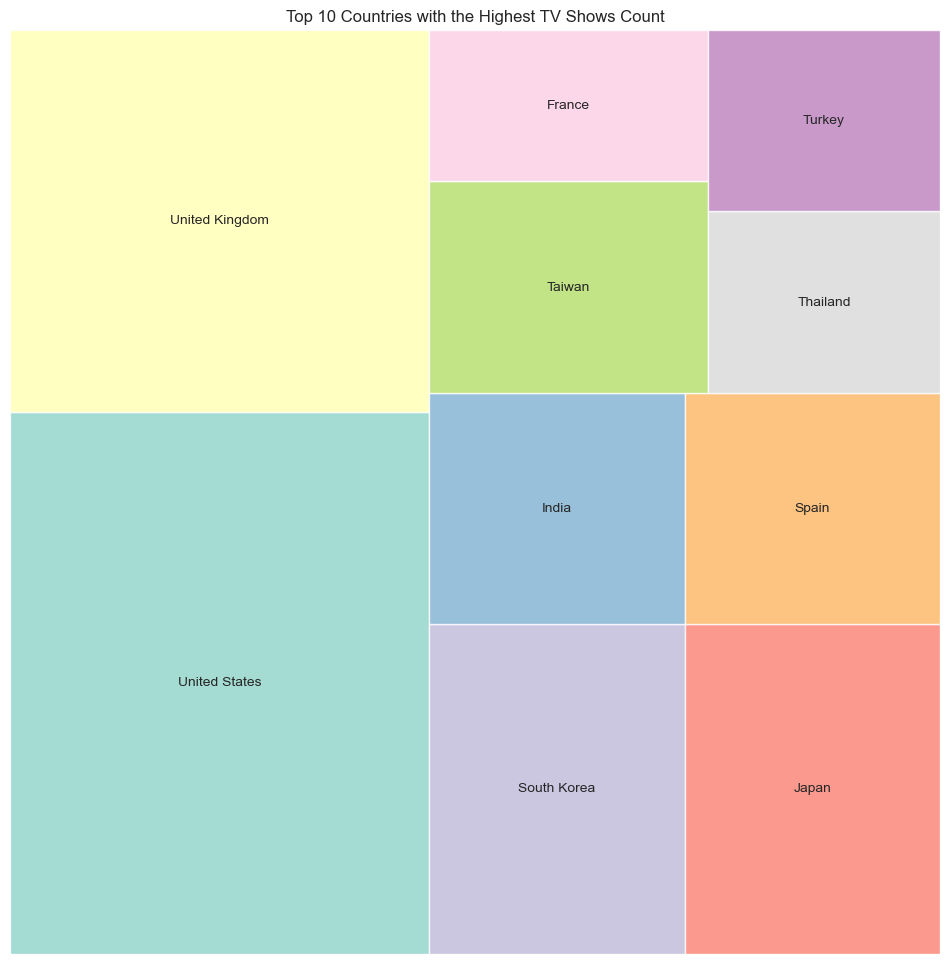

In [99]:
import matplotlib.pyplot as plt
import squarify
top_10_countries = show_count_country.sort_values('show_count', ascending=False).head(10)

plt.figure(figsize = (12, 12))
# Compute the treemap coordinates
norm_counts = top_10_countries['show_count'] / top_10_countries['show_count'].sum()
squarify.plot(sizes=norm_counts, label=top_10_countries['country'], alpha=.8, color=plt.cm.Set3(np.arange(len(top_10_countries))))
plt.axis('off')
plt.title('Top 10 Countries with the Highest TV Shows Count')
plt.show()


We can see that the US has released the most number of netflix tv shows followed by the UK & South Korea.

In [100]:
sub_netflix_shows = netflix_shows.copy()[["type", "country", "title", "release_year"]]
sub_netflix_shows = sub_netflix_shows.rename({'title':'show_count'}, axis = 1)
show_count_year = sub_netflix_shows.groupby(['type', 'country', 'release_year']).agg(['count'])
show_count_year.columns = show_count_year.columns.droplevel(1)
show_count_year = show_count_year.reset_index()
top_20_countries = show_count_year.sort_values('show_count', ascending=False).head(20)
top_20_countries

,type,country,release_year,show_count
95,TV Show,United States,2019,8
96,TV Show,United States,2020,5
79,TV Show,United Kingdom,2015,3
81,TV Show,United Kingdom,2017,3
83,TV Show,United Kingdom,2020,3
70,TV Show,Thailand,2020,3
93,TV Show,United States,2017,3
67,TV Show,Taiwan,2020,3
94,TV Show,United States,2018,2
5,TV Show,Brazil,2020,2


In [101]:
# Obtain the number of netflix movies for each country
sub_netflix_movies = netflix_movies.copy()[["type", "country", "title"]]
sub_netflix_movies = sub_netflix_movies.rename({'title':'movie_count'}, axis = 1)
movies_count_country = sub_netflix_movies.groupby(['type', 'country']).agg(['count'])
movies_count_country.columns = movies_count_country.columns.droplevel(1)
movies_count_country = movies_count_country.reset_index()
top_20_countries = movies_count_country.sort_values('movie_count', ascending=False).head(20)
top_20_countries

,type,country,movie_count
481,Movie,United States,1822
192,Movie,India,868
403,Movie,United Kingdom,164
43,Movie,Canada,104
110,Movie,Egypt,90
349,Movie,Spain,84
287,Movie,Nigeria,84
212,Movie,Indonesia,76
391,Movie,Turkey,74
249,Movie,Japan,73


In [102]:
countries={}
netflix_movies['country']=netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

C:\Users\User\AppData\Local\Temp\ipykernel_3148\3884906968.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [103]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'France'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Belgium'),
 Text(6, 0, 'China'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'Australia')]

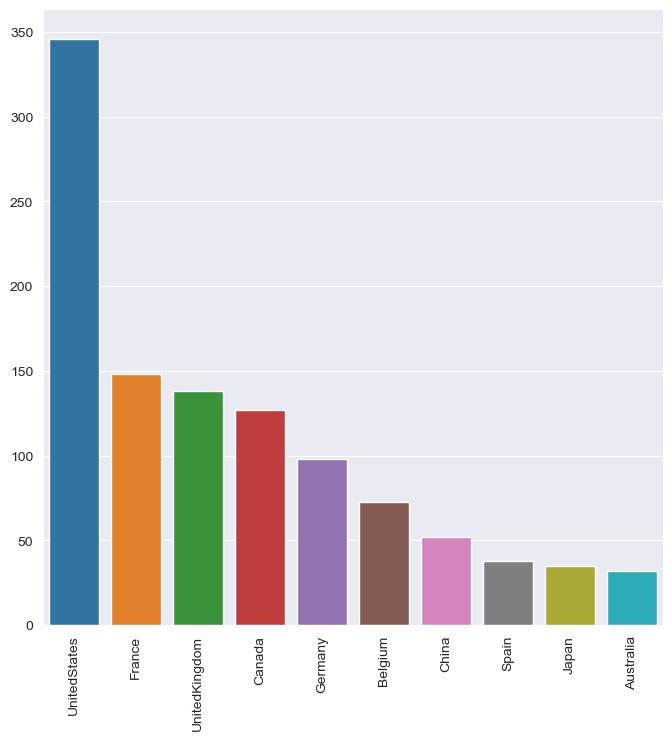

In [104]:
# Create a bar plot displaying the top 10 movie content creating countries
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

We can see that the US has created a lot of movie contents followed by France & the UK.

In [111]:
## add new features in the dataset
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Add a year aded column
df['year_added'] = df['date_added'].apply(lambda x: x.year if pd.notnull(x) else np.nan)



df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

# use datetime.strptime() to convert the month numbers to month names
df['month_added'] = df['date_added'].dt.strftime('%B')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_added,season_count,month_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,,September
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9,September
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,,September
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,,September
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021,,September


In [45]:
# Create a lineplot that represents the content added pver the years
import plotly.graph_objects as go

d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

From the given chart, we can infer that Netlfix has added a lot of movies ever since 2015 and we can observe that the highest number of movies were added in the year 2019. From the year 2020, we can see a dramatic decline in the number of movies added to the Netflix platform. 

As far as the TV shows are concerned, we don't see a steady increase in the amount of content added to Netflix. The amount of content added to Netflix is almost constant until the yer 2020. Post 2020, we can see a decline in the number of tv shows that are added to Netflix.

In [129]:
# Create a bar plot to display the months during whoch the most amount of content (tv shows) were added
col = 'month_added'
vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values('count', ascending = False)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
data = [trace1]
layout = go.Layout(title="During which month, the TV Shows was added the most?", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

From the given bar plot above, we can observe that most of the TV shows were added to Netflix in the month of Decemeber followed by August & March.

In [130]:
# Create a bar plot to display the months during whoch the most amount of content (movies) were added
col = 'month_added'
vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values('count', ascending = False)

trace1 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#a678de"))
data = [trace1]
layout = go.Layout(title="During which month, the movies was added the most?", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

This bar plot explains that the most number of movies were added in the month of October & the least number of movies were added in the month of February.

In [66]:
# Create a world map & a bar plot displaying the countries with the most content (includes tv shows & movies)
from plotly.offline import init_notebook_mode, iplot
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

## countries 
from collections import Counter
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
    
def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['country'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
            type = 'choropleth',
            locations = list(country_with_code.keys()),
            z = list(country_with_code.values()),
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = ''),
          ) ]

    layout = dict(
        title = '',
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    iplot( fig, validate=False, filename='d3-world-map' )
    return country

country_vals = geoplot(df)
tabs = Counter(country_vals).most_common(25)

labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Countries with most content", height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()


From the plots above, one can infer that the US is the country with the most amount of content followed by India & the UK.

In [114]:
d1 = df[df["type"] == "TV Show"]
col = 'season_count'
vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values("count", ascending=False)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
data = [trace1]
layout = go.Layout(title="TV Shows with the highest number of seasons", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

We can see that this most of the TV Shows that were released on Netflix had only 1 season.

C:\Users\User\AppData\Local\Temp\ipykernel_7272\2823159706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['duration'] = netflix_movies['duration'].str.replace('min', '')
C:\Users\User\AppData\Local\Temp\ipykernel_7272\2823159706.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['duration'] = pd.to_numeric(netflix_movies['duration'], errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_7272\2823159706.py:9: SettingWithCopyWarning: 
A value is trying to be set on a 

<Axes: xlabel='duration', ylabel='Density'>

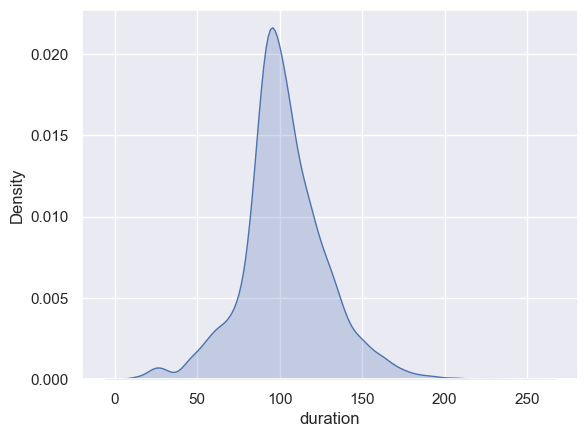

In [38]:
# Create a kernel density plot to estimate to analyze the duration of movies
# Remove 'min' from the duration column
netflix_movies['duration'] = netflix_movies['duration'].str.replace('min', '')

# Replace non-numeric values with NaN
netflix_movies['duration'] = pd.to_numeric(netflix_movies['duration'], errors='coerce')

# Drop rows with NaN values
netflix_movies.dropna(inplace=True)

# Convert duration column from float to int64 datatype
netflix_movies['duration'] = netflix_movies['duration'].astype('int64')

# Plot the distribution of movie durations
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)

This kde plot tells us that a good amount of movies on Netflix are among the duration of 75-120 mins. 

In [39]:
from collections import Counter

genres=list(netflix_movies['genre'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

C:\Users\User\AppData\Local\Temp\ipykernel_7272\87737161.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x, rotation=90)


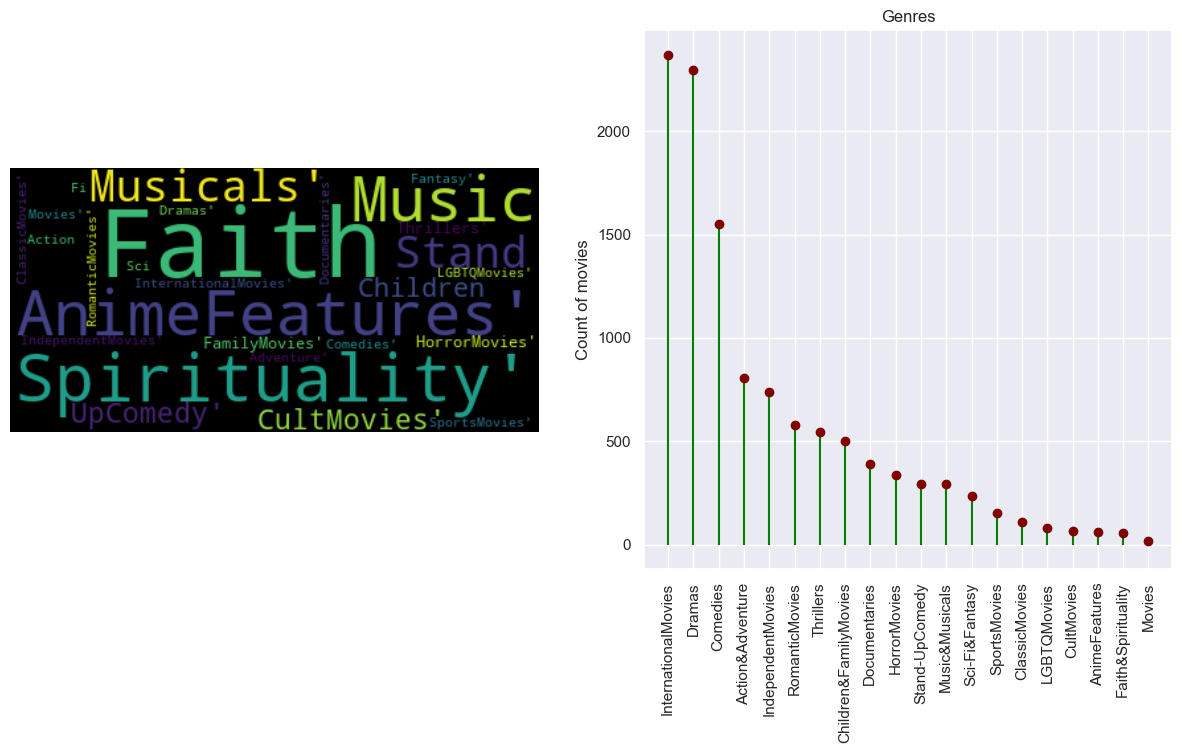

In [40]:
# Create a wordcloud and a lollipop plot that display the most popular movie genres and merge them in one-single display
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate wordcloud
text = list(set(gen))
wordcloud = WordCloud(max_words=1000000,background_color="black").generate(str(text))

# Plot wordcloud
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis("off")

# Plot bar chart
g = {k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}
x = list(g.keys())
y = list(g.values())
ax2.vlines(x, ymin=0, ymax=y, color='green')
ax2.plot(x, y, "o", color='maroon')
ax2.set_xticklabels(x, rotation=90)
ax2.set_ylabel("Count of movies")
ax2.set_title("Genres")

# Display both plots
plt.show()


From both the plots, we can infer that the movie genre "International Movies" is the most popular followed by "Dramas" & "Comedies"

In [41]:
from collections import Counter

genres=list(netflix_shows['genre'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

C:\Users\User\AppData\Local\Temp\ipykernel_7272\3112916859.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x, rotation=90)


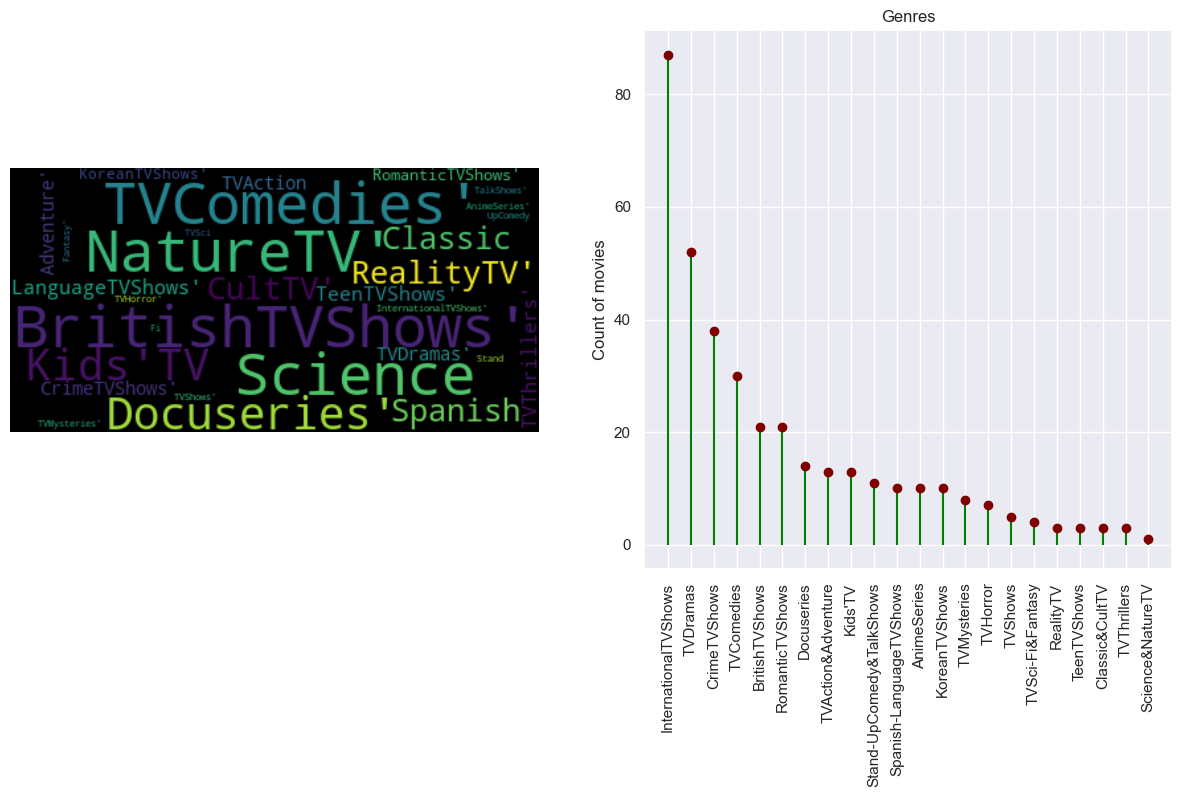

In [42]:
# Create a wordcloud and a lollipop plot that display the most popular tv show genres and merge them in one-single display
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate wordcloud
text = list(set(gen))
wordcloud = WordCloud(max_words=1000000,background_color="black").generate(str(text))

# Plot wordcloud
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis("off")

# Plot bar chart
g = {k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}
x = list(g.keys())
y = list(g.values())
ax2.vlines(x, ymin=0, ymax=y, color='green')
ax2.plot(x, y, "o", color='maroon')
ax2.set_xticklabels(x, rotation=90)
ax2.set_ylabel("Count of movies")
ax2.set_title("Genres")

# Display both plots
plt.show()

From both the plots above, it can be seen that the most popular tv show genres are "International TV Shows" followed by "TVDramas" & "CrimeTV Shows".

In [50]:
features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

C:\Users\User\AppData\Local\Temp\ipykernel_3148\315267630.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_3148\315267630.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_3148\4291655225.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

<Axes: xlabel='title'>

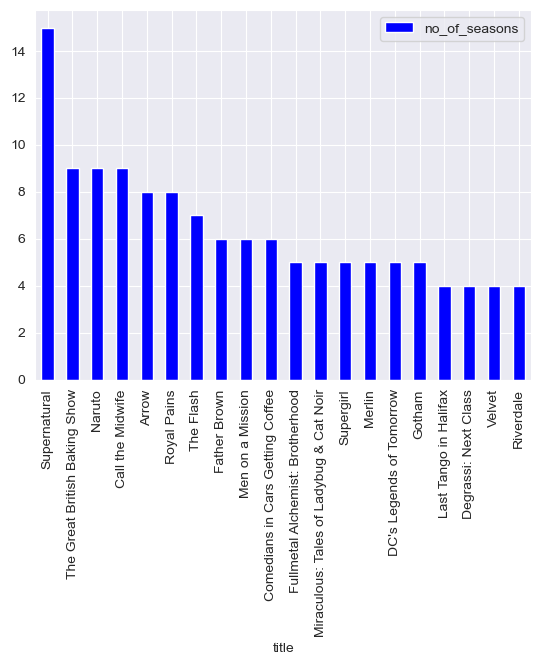

In [53]:
# Create a bar plot that displays the TV Shows with the largest number of seasons
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='blue')

From the given bar plot, it can be observed that the TV show has the largest number of seasons followed by "The Great British Baking Show" & "Naruto". 

In [54]:
# Create a table displaying the tv shows with the least number of seasons
bottom=top.sort_values(by='no_of_seasons')
bottom=bottom[20:40]

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'No of seasons']),
                 cells=dict(values=[bottom['title'],bottom['no_of_seasons']],fill_color='lavender'))
                     ])
fig.show()

In [59]:
# Create a table that displays the oldest US tv shows that were released on Netflix
us_series_data = df[df['country']=='United States']
oldest_us_series=us_series_data.sort_values(by='release_year')[0:20]
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='paleturquoise'),
                 cells=dict(values=[oldest_us_series['title'],oldest_us_series['release_year']],fill_color='pink'))
                     ])
fig.show()

In [60]:
# Obtain the table that displays the new US tv shows released on Netflix
newest_us_series=us_series_data.sort_values(by='release_year', ascending=False)[0:50]
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='yellow'),
                 cells=dict(values=[newest_us_series['title'],newest_us_series['release_year']],fill_color='lavender'))
                     ])
fig.show()

In [118]:
# Create a few bar plots displaying the top actors on Netflix with most movies
def country_trace(country, flag="movie"):
    df["from_us"] = df['country'].fillna("").apply(lambda x: 1 if country.lower() in x.lower() else 0)
    small = df[df["from_us"] == 1]
    if flag == "movie":
        small = small[small["duration"] != ""]
    else:
        small = small[small["season_count"] != ""]
    cast = ", ".join(small['cast'].fillna("")).split(", ")
    tags = Counter(cast).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0] + "  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="red"))
    return trace


from plotly.subplots import make_subplots

traces = []
titles = ["United States", "", "India", "", "Canada", "", "Japan"]
for title in titles:
    if title != "":
        traces.append(country_trace(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1, 1)
fig.add_trace(traces[1], 1, 3)
fig.add_trace(traces[2], 1, 5)
fig.add_trace(traces[3], 2, 1)

fig.update_layout(height=1200, showlegend=False)
fig.show()


In [122]:
# Create a few bar plots displaying the most popular actors for Netflix TV shows in both the UK & the US
traces = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="red"))
traces = []
titles = ["United States", "", "United Kingdom"]
for title in titles:
    if title != "":
        traces.append(country_trace(title, flag="tv_shows"))

fig = make_subplots(rows=1, cols=3, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)

fig.update_layout(height=600, showlegend=False)
fig.show()

In [126]:
# Create a bar plot displaying the most popular movie directors in France
small = df[df["type"] == "Movie"]
small = small[small["country"] == "France"]

col = "director"
categories = ", ".join(small[col].fillna("")).split(", ")
counter_list = Counter(categories).most_common(12)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="deepskyblue"))

data = [trace1]
layout = go.Layout(title="Movie Directors from France with most content", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [128]:
# Create a bar plot displaying the most popular movie directors of the UK
small = df[df["type"] == "Movie"]
small = small[small["country"] == "United Kingdom"]

col = "director"
categories = ", ".join(small[col].fillna("")).split(", ")
counter_list = Counter(categories).most_common(12)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="black"))

data = [trace1]
layout = go.Layout(title="Movie Directors from the UK with most content", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [61]:
# Take a look at the most popular directors of all the netflix tv shows and movies in France
netflix_fr=df[df['country']=='France']
nannef=netflix_fr.dropna()
import plotly.express as px
fig = px.treemap(nannef, path=['country','director'],
                  color='director', hover_data=['director','title'],color_continuous_scale='Purples')
fig.show()

In [62]:
# Create a treemap displaying the most popular tv show & movie genres in France
netflix_fr=df[df['country']=='France']
nannef=netflix_fr.dropna()
import plotly.express as px
fig = px.treemap(nannef, path=['country','genre'],
                  color='genre', hover_data=['genre','title'],color_continuous_scale='Purples')
fig.show()

In [63]:
# Create a dataframe only for the US
netflix_us=df[df['country']=='United States']
netflix_us.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_added,month_added,season_count
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,September,
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103,Comedies,Mourning the loss of their beloved junior high...,2021,September,
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,2021,September,
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,2021-09-16,1975,PG,124,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...,2021,September,
42,s43,Movie,Jaws 2,Jeannot Szwarc,"Roy Scheider, Lorraine Gary, Murray Hamilton, ...",United States,2021-09-16,1978,PG,116,"Dramas, Horror Movies, Thrillers",Four years after the last deadly shark attacks...,2021,September,


In [64]:
# Create a treemap displaying the most popular movies & tv shows genres in India
plt.figure(figsize = (12, 12))
netflix_in=df[df['country']=='India']
nannin=netflix_in.dropna()
import plotly.express as px
fig = px.treemap(nannin, path=['country','genre'],
                  color='genre', hover_data=['genre','title'],color_continuous_scale='Purples')
fig.show()

<Figure size 1200x1200 with 0 Axes>

## Recommendation System

### Content Based

Content-based filtering is a type of recommendation system that suggests items to users based on their past behavior or preferences. It works by analyzing the content of items (such as movies or products) that a user has previously interacted with and then recommending other items that have similar content. For example, if a user has watched several action movies, a content-based filtering system might recommend other action movies that have similar themes, actors, or settings. Content-based filtering can be used in a variety of applications, such as e-commerce, music streaming, and online advertising.

Content-based filtering can be used to analyze the Netflix TV shows and movies dataset by recommending content that is similar to the user's previous preferences.

To do this, we can use various attributes of the TV shows and movies such as the genre, director, cast, plot summary, release year. For example, if a user has previously watched and liked a crime thriller TV show, we can recommend other crime thriller TV shows with similar themes, genres, cast, and directors.

Overall, content-based filtering can help in providing personalized recommendations to the users based on their past viewing history and preferences, thus enhancing their overall viewing experience.

To apply content-based filtering to the Netflix TV shows & movies dataset in Python, you can follow these general steps:

Preprocess the text data: Clean and preprocess the text data in the relevant columns ("title", "director", "cast", "country", "rating", and "description") using techniques such as removing stop words, stemming or lemmatization, and removing punctuation.

Extract features: Convert the preprocessed text data into numerical features that can be used for machine learning. You can use techniques such as bag-of-words, TF-IDF, or word embeddings to extract features from the text data.

Define a similarity metric: Choose a similarity metric to measure the similarity between different TV shows or movies based on their features. Some common similarity metrics for content-based filtering include cosine similarity and Euclidean distance.

Build a recommendation engine: Using the extracted features and similarity metric, build a recommendation engine that takes in a TV show or movie as input and outputs a list of similar TV shows or movies.

We will be using this content based filtering method on the following factors ['title', 'cast', 'director', 'genre', 'plot']

In [66]:
# Fill all the null values with an empty string
filledna=df.fillna('')
filledna.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,24-Sep-21,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [67]:
# Clean the data by putting all the words in lower case
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [68]:
# Identify the features on which this model is to be filtered
features=['title','director','cast','genre','description']
filledna=filledna[features]

In [69]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head(2)

,title,director,cast,genre,description
7,sankofa,hailegerima,"kofighanaba,oyafunmikeogunlano,alexandraduah,n...","dramas,independentmovies,internationalmovies","onaphotoshootinghana,anamericanmodelslipsbacki..."
8,thegreatbritishbakingshow,andydevonshire,"melgiedroyc,sueperkins,maryberry,paulhollywood","britishtvshows,realitytv",atalentedbatchofamateurbakersfaceoffina10-week...


In [70]:
# Create a soup or a bag of words for all rows
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['genre']+' '+ x['description']

In [71]:
filledna['soup'] = filledna.apply(create_soup, axis=1)

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [73]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [77]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [78]:
# Recommend me similar movies to the Indian movie 'Jeans' in terms of the director, genre, cast & description
get_recommendations_new('Jeans', cosine_sim2)

2280          Mumbai Delhi Mumbai
2082         Maniyarayile Ashokan
4390    Christmas Wedding Planner
978                        Deliha
2429               Can’t Complain
2512                    Zaki Chan
1863                     Hunterrr
1942                      Ishqiya
2490          The Married Couples
3189                   Baby Dolls
Name: title, dtype: object

In [79]:
# Recommend me similar movies to the Indian Movie 'Angamaly Diaries' in terms of the director, genre, cast & description
get_recommendations_new('Angamaly Diaries', cosine_sim2)

2610                                R.K.Nagar
3939                                    Petta
4782    The Legacy of a Whitetail Deer Hunter
5104                                The Climb
5617                           Happy New Year
2738                       Muqaddar ka Faisla
2873                  Ala Vaikunthapurramuloo
3135                                   Fukrey
6960                               Hera Pheri
6429                          Casino Tycoon 2
Name: title, dtype: object

In [83]:
# Recommend me similar movies to the American movie 'Dark Skies' in terms of the director, genre, cast & the description
get_recommendations_new('Dark Skies', cosine_sim2)

4133    Await Further Instructions
3102                    Sweetheart
2749                      Wildling
7286                        Legion
2705                    Dark Light
6600                  Devil's Gate
8279                The Diabolical
610                     Underworld
6180                     Apollo 18
6189                    Assimilate
Name: title, dtype: object

In [87]:
# Recommend me similar TV shows to that of 'Gone for Good' in terms of the director, genre, cast & the description
get_recommendations_new('Gone for Good', cosine_sim2)

3589                                    Sacred Games
3036                    Jamtara - Sabka Number Ayega
7112                                     Jack Taylor
2522                               Inhuman Resources
2602                    The Forest of Love: Deep Cut
4664                                Age of Rebellion
503                                         The Mire
2527    Sleepless Society: Two Pillows & A Lost Soul
2251                                      The Twelve
4174                                        Innocent
Name: title, dtype: object

In [91]:
# Recommend me similar movies to that of 'PK' in terms of the director, genre, cast & the description
get_recommendations_new('PK', cosine_sim2)

1114                           3 Idiots
8391       The Legend of Michael Mishra
4790                  Anthony Kaun Hai?
1022                   Taare Zameen Par
4507                              Sanju
2720                            Dostana
4427                    Chance Pe Dance
6439                    Chal Dhar Pakad
195     EMI: Liya Hai To Chukana Padega
2747                              Ungli
Name: title, dtype: object

## Testing some of the hypotheses 

To test the hypothesis that the number of movies & TV shows added to Netflix has increased over the years:

<Axes: title={'center': 'Number of Titles on Netflix Over Time'}, xlabel='release_year'>

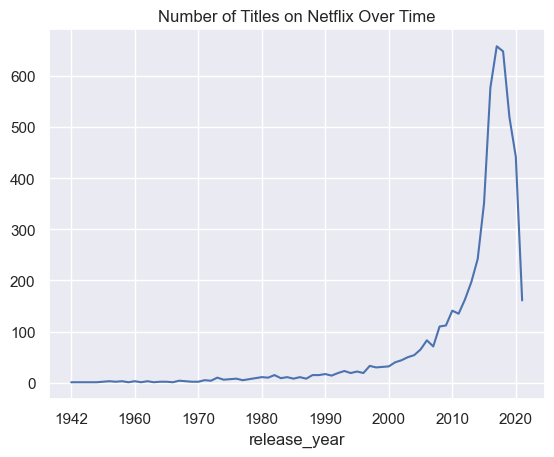

In [88]:
# Group the dataset by year and count the number of titles added each year
titles_per_year = df.groupby('release_year')['title'].count()

# Plot the data to visualize the trend over time
titles_per_year.plot(kind='line', title='Number of Titles on Netflix Over Time')


From the given line plot, one can infer that the number of release of tv shows and movies has increased ever since 1990 until about 2015. From the year 2015, we observe a sharp decline in the number of releases of tv shows & movies.

To test the hypothesis that the US produces a majority of content on Netflix:

In [89]:
# Group the dataset by country and count the number of titles produced by each country
titles_by_country = df.groupby('country')['title'].count()

# Calculate the percentage of titles produced by the US
us_titles_percent = (titles_by_country['United States'] / titles_by_country.sum()) * 100

print(f"Percentage of titles produced by the US: {us_titles_percent:.2f}%")


Percentage of titles produced by the US: 34.65%


US does produce a majority of content on Netflix.

To test the hypothesis that the most common genre on Netflix is drama:

In [90]:
# Group the dataset by genre and count the number of titles in each genre
titles_by_genre = df.groupby('genre')['title'].count()

# Find the genre with the highest number of titles
most_common_genre = titles_by_genre.idxmax()

print(f"Most common genre on Netflix: {most_common_genre}")


Most common genre on Netflix: Dramas, International Movies


Most common genres on Netflix are Dramas & International Movies. This hypothesis turns out to be true.